In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np
import random
import math
import textwrap
from scipy.stats import pearsonr, spearmanr, kendalltau
from tabulate import tabulate
plt.rcParams['font.family'] = 'Times New Roman'

# 参考链接：https://zhuanlan.zhihu.com/p/93423829

### 单栏折线图

<Figure size 640x480 with 0 Axes>

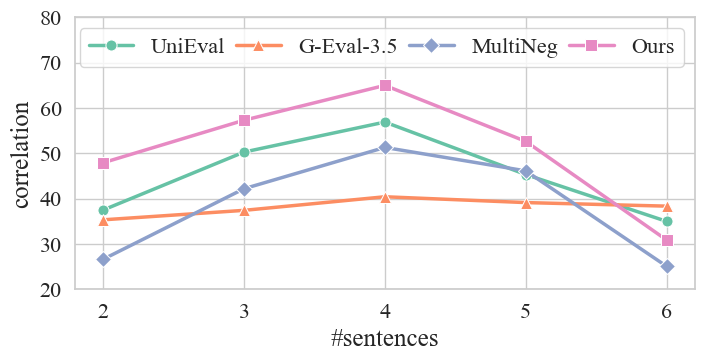

In [91]:
x = [2,3,4,5,6]
unieval = [37.46679946589498, 50.25944536935053, 56.87632389985696, 45.30773147330498, 34.96657994713719]
chatgpt = [35.31441795329959, 37.40165566059502, 40.401429177948245, 39.117825583280336, 38.33250100085947]
multineg = [26.601913340754717, 42.17123928533103, 51.285001125064575, 46.110418302681914, 25.04570297017013]
ours = [47.90319255658225, 57.2832228214499, 64.97055423962387, 52.616186196330894, 30.847258223286424]

df = pd.DataFrame({'x': x, 'unieval':unieval, 'chatgpt':chatgpt, 'multineg':multineg, 'ours':ours})

sns.set(style='whitegrid', palette='Set2', font='Times New Roman', context='notebook')
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(8,4))

sns.lineplot(data=df, x="x", y="unieval", label="UniEval", marker='o', linewidth=2.5, markersize=8)
sns.lineplot(data=df, x="x", y="chatgpt", label="G-Eval-3.5", marker='^', linewidth=2.5, markersize=8)
sns.lineplot(data=df, x="x", y="multineg", label="MultiNeg", marker='D', linewidth=2.5, markersize=8)
sns.lineplot(data=df, x="x", y="ours", label="Ours", marker='s', linewidth=2.5, markersize=8)

ax.set_xlabel("#sentences", fontsize=18)
ax.set_ylabel("correlation", fontsize=18)
ax.legend(fontsize=16, loc='upper right', ncol=4, columnspacing=0.5)

xticks = [2,3,4,5,6]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=16)
yticks = [20, 30, 40, 50, 60, 70, 80]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=16)


plt.subplots_adjust(bottom=0.2)

### 双栏折线图

In [21]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sample_level_spearman = np.array([0.590419,0.598771,0.606512,0.608495,0.600771,0.589519,0.576689,0.556163,0.523017]) * 100
sample_level_pearson = np.array([0.560815, 0.571816, 0.582206, 0.59102, 0.596425, 0.595665, 0.58544, 0.56287, 0.526122]) * 100
sample_level_kendall =  np.array([0.451535, 0.460343, 0.467314, 0.469495, 0.463265, 0.454876, 0.444554, 0.429763, 0.405043]) * 100

dataset_level_spearman = np.array([0.650119, 0.658763, 0.661388, 0.660597, 0.656008, 0.647673, 0.634195, 0.609916, 0.571681]) * 100
dataset_level_pearson = np.array([0.583684, 0.59286, 0.601127, 0.607433, 0.610161, 0.607005, 0.595001, 0.570978, 0.532607]) * 100
dataset_level_kendall = np.array([0.470999, 0.47915, 0.481966, 0.481535, 0.478399, 0.473177, 0.463308, 0.446146, 0.417924]) * 100


<Figure size 640x480 with 0 Axes>

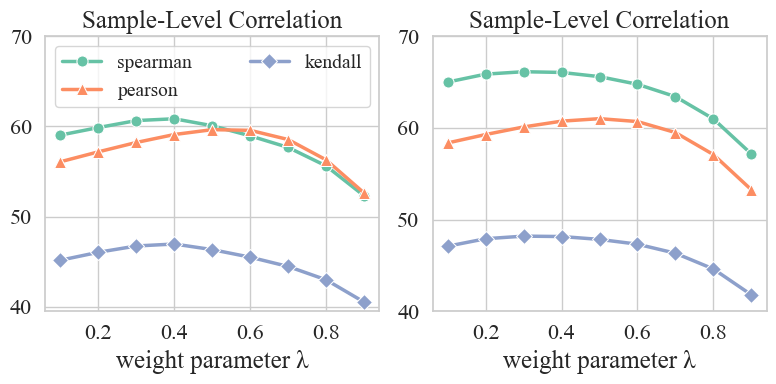

In [84]:
sns.set(style='whitegrid', palette='Set2', font='Times New Roman', context='notebook')
plt.figure()
fig, ax = plt.subplots(1,2,figsize=(8,4))

# subplot 1
sns.lineplot(ax=ax[0], x=x, y=sample_level_spearman, label="spearman", linewidth=2.5, marker='o', markersize=8)
sns.lineplot(ax=ax[0], x=x, y=sample_level_pearson, label="pearson", linewidth=2.5, marker='^', markersize=8)
sns.lineplot(ax=ax[0], x=x, y=sample_level_kendall, label="kendall", linewidth=2.5, marker='D', markersize=8)
ax[0].set_title("Sample-Level Correlation", fontsize=18)
ax[0].set_xlabel("weight parameter λ",fontsize=18)
ax[0].legend(loc='upper right',fontsize=14, ncol=2, columnspacing=3)

xticks = [0.2, 0.4, 0.6, 0.8]
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks, fontsize=16)
yticks = [40, 50, 60, 70]
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(yticks, fontsize=16)

# subplot 2
sns.lineplot(ax=ax[1], x=x, y=dataset_level_spearman, label="spearman", linewidth=2.5, marker='o', markersize=8)
sns.lineplot(ax=ax[1], x=x, y=dataset_level_pearson, label="pearson", linewidth=2.5, marker='^', markersize=8)
sns.lineplot(ax=ax[1], x=x, y=dataset_level_kendall, label="kendall", linewidth=2.5, marker='D', markersize=8)
ax[1].set_title("Sample-Level Correlation", fontsize=18)
ax[1].set_xlabel("weight parameter λ",fontsize=18)
ax[1].legend(loc='upper right',fontsize=14, ncol=1).remove()

xticks = [0.2, 0.4, 0.6, 0.8]
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks, fontsize=16)
yticks = [40, 50, 60, 70]
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(yticks, fontsize=16)

plt.tight_layout()
plt.show()

### 柱状图

<Figure size 640x480 with 0 Axes>

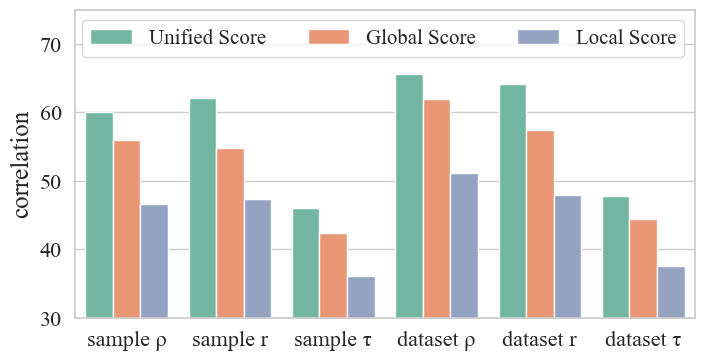

In [97]:
x = ["sample ρ", "sample r", "sample τ", "dataset ρ", "dataset r", "dataset τ"]
unified_score = np.array([0.600, 0.621, 0.460, 0.656, 0.642, 0.478]) * 100
global_score = np.array([0.560, 0.548, 0.424, 0.619, 0.574, 0.444]) * 100
local_score = np.array([0.466, 0.474, 0.361, 0.512, 0.480, 0.375]) * 100

df = pd.DataFrame({'Method': x, 'Unified Score': unified_score, 'Global Score': global_score, 'Local Score': local_score})
df_melted = df.melt('Method', var_name='Comparison', value_name='Value')

sns.set(style='whitegrid', palette='Set2', font='Times New Roman', context='notebook')
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(8,4))

sns.barplot(x='Method', y='Value', hue='Comparison', data=df_melted)

ax.set(ylim=(30, 75))
ax.legend(fontsize=15, ncol=3).set_title('')
# Add labels and title
plt.xlabel('')
plt.ylabel('correlation', fontsize=18)
plt.xticks(size=16)
plt.yticks([30, 40, 50, 60, 70], size=16)

# Show the plot
plt.savefig("ablation_scoring.pdf")
plt.show()
